In [2]:
import cv2
import json
import matplotlib.pyplot as plt
import tqdm

In [3]:
with open('/home/fer/Escritorio/futstatistics/datasets/dataset6_keypoints/dataset6_keypoints_coco/annotations/train_corrected_annotations.coco.json') as f:
    data = json.load(f)


# with open('/home/fer/Escritorio/futstatistics/datasets/dataset6_keypoints/dataset6_keypoints_coco/annotations/train_annotations.coco.json') as f:
#     data = json.load(f)

In [4]:
anns = data['annotations']
imgs = data['images']


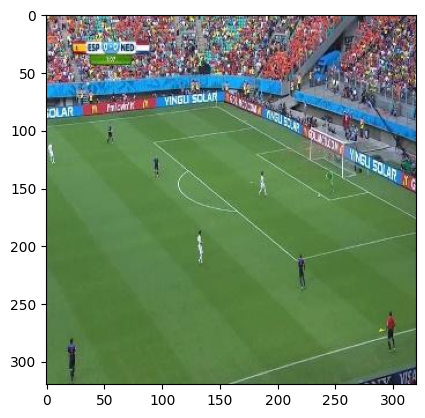

In [5]:
filename = "102_jpg.rf.a32af053566bea2f5fed38f7e766bb7c.jpg"
filename_path  = "/home/fer/Escritorio/futstatistics/datasets/dataset6_keypoints/dataset6_keypoints_YOLOV5/train/images/" + filename

img = cv2.cvtColor(cv2.imread(filename_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
img_id = [row['id'] for row in imgs if row['file_name'] == filename][0]
img_id

158

In [7]:
anns_0 = [ann for ann in anns if ann['image_id'] == img_id]
print(anns_0)

[{'id': 1063, 'image_id': 158, 'category_id': 22, 'bbox': [159, 165, 10, 10], 'area': 100, 'segmentation': [], 'iscrowd': 0}, {'id': 1064, 'image_id': 158, 'category_id': 21, 'bbox': [117, 130, 10, 10], 'area': 100, 'segmentation': [], 'iscrowd': 0}, {'id': 1065, 'image_id': 158, 'category_id': 15, 'bbox': [212, 208, 10, 10], 'area': 100, 'segmentation': [], 'iscrowd': 0}, {'id': 1066, 'image_id': 158, 'category_id': 12, 'bbox': [240, 156, 10, 10], 'area': 100, 'segmentation': [], 'iscrowd': 0}, {'id': 1067, 'image_id': 158, 'category_id': 11, 'bbox': [273, 148, 10, 10], 'area': 100, 'segmentation': [], 'iscrowd': 0}, {'id': 1068, 'image_id': 158, 'category_id': 10, 'bbox': [177, 116, 10, 10], 'area': 100, 'segmentation': [], 'iscrowd': 0}, {'id': 1069, 'image_id': 158, 'category_id': 9, 'bbox': [205, 112, 10, 10], 'area': 100, 'segmentation': [], 'iscrowd': 0}, {'id': 1070, 'image_id': 158, 'category_id': 8, 'bbox': [89, 106, 10, 10], 'area': 100, 'segmentation': [], 'iscrowd': 0}, {'

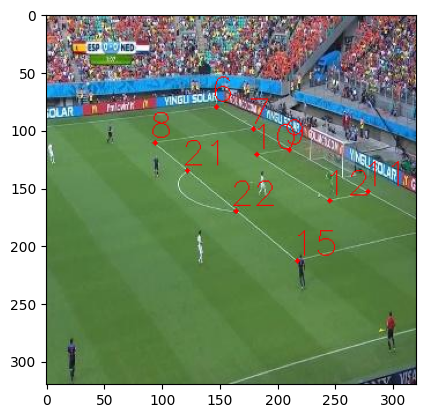

In [8]:
image_ann = img.copy()

for ann in anns_0:
    bbox = ann['bbox']
    top_left = (bbox[0], bbox[1])
    bottom_right = (bbox[0] + bbox[2], bbox[1] + bbox[3])
    center_x = int((bottom_right[0] + top_left[0]) / 2)
    center_y = int((bottom_right[1] + top_left[1]) / 2)

    # Store the calculated values in a tuple to represent the center of the box
    center = (center_x, center_y)
    # print(f'BBOX: {bbox}')
    image_ann = cv2.circle(image_ann, center, 2, (255, 0, 0), -1)
    image_ann = cv2.putText(image_ann, str(ann['category_id']), (bbox[0], bbox[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),1)

    # print(f"P1 : {(bbox[0] - 10 , bbox[1] - 10)}")
    # print(f"P2 : {(bbox[0] + 10, bbox[1] + 10)}")
    # print("-------------------------------------")

plt.imshow(image_ann)